In [159]:
path = 'HCMST 2017 fresh sample for public sharing draft v1.1.dta'
import pandas as pd
data = pd.read_stata(path)

## Data preparation

In [160]:
data.head()

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,...,no,no,no,no,White,no,12.0,14.0,12.0,14.0
1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,70841.0,...,no,no,no,yes,White,no,12.0,16.0,17.0,17.0
2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,56227.0,...,no,no,no,no,White,no,9.0,7.5,14.0,17.0
3,6,2648857,Qualified,1.2597,98682.0,1.3507,1.2524,98110.0,0.418556,29052.0,...,no,no,no,no,White,no,16.0,12.0,12.0,12.0
4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,67781.0,...,no,no,yes,no,White,no,14.0,17.0,16.0,16.0


In [161]:
data.columns

Index(['CaseID', 'CASEID_NEW', 'qflag', 'weight1', 'weight1_freqwt', 'weight2',
       'weight1a', 'weight1a_freqwt', 'weight_combo', 'weight_combo_freqwt',
       ...
       'hcm2017q24_met_through_family', 'hcm2017q24_met_through_friend',
       'hcm2017q24_met_through_as_nghbrs', 'hcm2017q24_met_as_through_cowork',
       'w6_subject_race', 'interracial_5cat', 'partner_mother_yrsed',
       'subject_mother_yrsed', 'partner_yrsed', 'subject_yrsed'],
      dtype='object', length=285)

In [162]:
y = data['S1']
y.value_counts()

Yes, I am Married       2085
No, I am not Married    1425
Name: S1, dtype: int64

In [163]:
x = data.drop(['S1'], inplace=False, axis=1)
x.head()

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,...,no,no,no,no,White,no,12.0,14.0,12.0,14.0
1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,70841.0,...,no,no,no,yes,White,no,12.0,16.0,17.0,17.0
2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,56227.0,...,no,no,no,no,White,no,9.0,7.5,14.0,17.0
3,6,2648857,Qualified,1.2597,98682.0,1.3507,1.2524,98110.0,0.418556,29052.0,...,no,no,no,no,White,no,16.0,12.0,12.0,12.0
4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,67781.0,...,no,no,yes,no,White,no,14.0,17.0,16.0,16.0


### Choosing ge

In [164]:
features = ["Q9", "Q16", "w6_sex_frequency", "partner_yrsed", "ppagecat"]

* Q9 - partner's age
* Q16 - relatives seen
* partnet_yrsed - partner's educational attainment
* ppagecat - age

In [166]:
x = x[features]

In [167]:
x = x.rename(index=str, columns={
    "Q9": "partner_age",
    "Q16": "relatives_seen",
    "w6_sex_frequency": "sex_frequency",
    "partner_yrsed": "educational_attainment",
    "ppagecat": "age"
})

In [168]:
x.head()

,partner_age,relatives_seen,sex_frequency,educational_attainment,age
0,NaN,NaN,NaN,12.0,25-34
1,52,1.0,Once a month or less,17.0,55-64
2,45,0.0,2 to 3 times a month,14.0,45-54
3,NaN,NaN,NaN,12.0,25-34
4,59,0.0,3 to 6 times a week,16.0,55-64


In [169]:
for f in x.columns:
    print("\n################ {} ##########\n".format(f))
    print(x[f].value_counts(dropna=False))


################ partner_age ##########

NaN        654
55.0        79
60.0        73
58.0        70
62.0        66
27.0        64
53.0        64
29.0        63
37.0        63
52.0        63
30.0        62
56.0        61
63.0        60
26.0        60
34.0        58
65.0        58
59.0        57
28.0        56
61.0        56
49.0        55
46.0        54
42.0        54
50.0        53
57.0        53
45.0        51
36.0        50
38.0        50
64.0        50
54.0        49
51.0        48
          ... 
22.0        29
74.0        28
21.0        25
24.0        24
23.0        24
73.0        23
Refused     21
78.0        19
76.0        19
79.0        17
77.0        13
18.0        12
20.0        12
80.0        11
81.0         8
19.0         7
84.0         7
83.0         7
82.0         3
91.0         3
85.0         3
86.0         3
90.0         2
17.0         2
87.0         1
95.0         1
16.0         1
14.0         1
10.0         1
89.0         1
Name: partner_age, Length: 80, dtype: int64

In [170]:
x = x[-pd.isna(x['educational_attainment'])]

In [171]:
x = x[-pd.isna(x['partner_age'])]

In [172]:
x = x[x['partner_age'] != 'Refused']

In [173]:
x = x[-pd.isna(x['relatives_seen'])]

In [174]:
x = x[-pd.isna(x['sex_frequency'])]

In [175]:
x = x[x['sex_frequency'] != 'Refused']

In [176]:
len(x)

2663

In [177]:
x.head()

,partner_age,relatives_seen,sex_frequency,educational_attainment,age
1,52,1.0,Once a month or less,17.0,55-64
2,45,0.0,2 to 3 times a month,14.0,45-54
4,59,0.0,3 to 6 times a week,16.0,55-64
5,60,0.0,Once a month or less,16.0,55-64
6,67,0.0,Once a month or less,13.0,65-74


In [178]:
x['partner_age'] = x['partner_age'].astype('float')

In [179]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['educational_attainment', 'relatives_seen', 'partner_age']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['age', 'sex_frequency']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Train model

In [180]:
from xgboost import XGBClassifier

In [181]:
x.head()

,partner_age,relatives_seen,sex_frequency,educational_attainment,age
1,52.0,1.0,Once a month or less,17.0,55-64
2,45.0,0.0,2 to 3 times a month,14.0,45-54
4,59.0,0.0,3 to 6 times a week,16.0,55-64
5,60.0,0.0,Once a month or less,16.0,55-64
6,67.0,0.0,Once a month or less,13.0,65-74


In [182]:
valid_rows = [int(row) for row in x.index]
y = y[valid_rows]

In [183]:
print(x.shape, y.shape)

(2663, 5) (2663,)


In [299]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
rf_clf = Pipeline(steps=[('preprocessor', preprocessor), ('clf', RandomForestClassifier())])
rf_clf = rf_clf.fit(x, y)

/home/michal/Desktop/xai_mim/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Observation to be explained

In [308]:
observation = x.iloc[70:71]
observation

,partner_age,relatives_seen,sex_frequency,educational_attainment,age
99,29.0,3.0,Once or twice a week,16.0,25-34


### Person details
Widzimy osobę w przedziale wiekowym 25-34 lata, której partner ma lat 29, a jego najwyższe wykształcenie to licencjat. Para uprawia seks 1-2 razy w tygodniu. Badana osoba spotyka średnio miesięczne troje krewnych.

In [315]:
rf_clf.classes_

array(['No, I am not Married', 'Yes, I am Married'], dtype=object)

In [319]:
print('Szansa pozostania w związku wynosi {}'.format(rf_clf.predict_proba(observation)[0][1]))

Szansa pozostania w związku wynosi 0.6


In [320]:
import numpy as np
def break_down(obs, variables, data, model):
    data = data.copy()
    average = np.mean(model.predict_proba(data)[::, 1])
    attributions = [average]
    for var in variables:
        data[var] = obs[var].iloc[0]
        prev_average = average
        average = np.mean(model.predict_proba(data)[::, 1])
        attributions.append(average - prev_average)
    return attributions

In [321]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import sklearn
warnings.filterwarnings("ignore", category=sklearn.exceptions.DataConversionWarning)
def plot_break_down(obs, variables, data, model):
    plt.figure(figsize=(16, 6))
    plt.bar(['intercept'] + variables, break_down(obs, variables, data, model))    

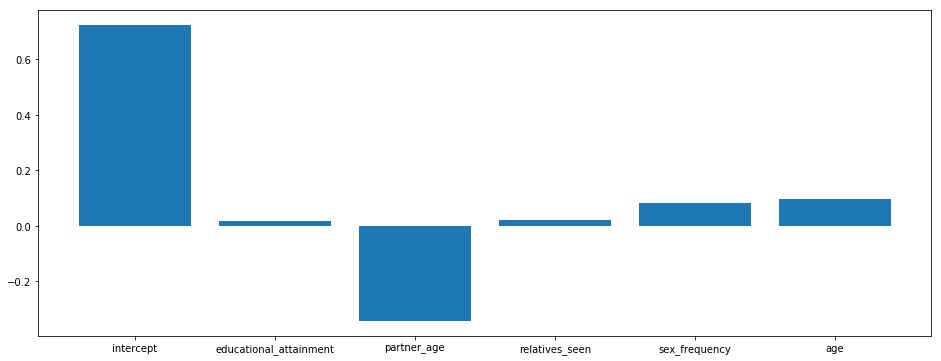

In [322]:
plot_break_down(observation, 
                ['educational_attainment', 'partner_age', 'relatives_seen', 'sex_frequency', 'age'],
                x, rf_clf)

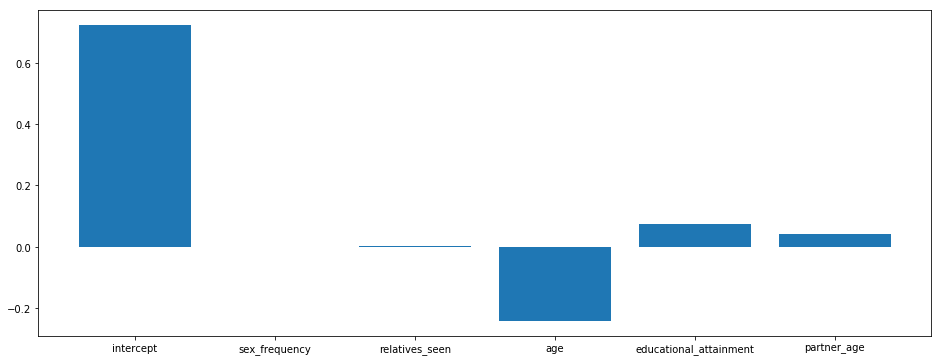

In [323]:
plot_break_down(observation, 
                ['sex_frequency', 'relatives_seen', 'age', 'educational_attainment', 'partner_age'],
                x, rf_clf)

#### Comparison
Widzimy wyraźną różnicę - wiek i wiek partnera mają kontrybucje o przeciwnych znakach dla różnych kolejnościach. To jednak nie dziwi, gdyż są to zmienne bardzo silnie skorelowane. Ponadto, sex_frequency ma mniejsze znaczenie średnio dla całego zbioru niż dla par zbliżonych do opisywanej. Dodatkowo, widzimy, że szansa utrzymania związku jest mniejsza niż dla średniej pary ze zbioru (predykcja niższa niż wartość średnia (intercept))